In [1]:

import numpy as np
import rdkit
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve

In [2]:
df = df = pd.read_csv('main_comma_separated.csv',on_bad_lines='skip')
df
#smiles, standard type, standard value

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value
0,CHEMBL253309,NaN,NaN,563.79,1.0,3.30,"3, cyclo(-L-Am7(S2Py)-Aib-L-Leu-D-Pro-)",CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...,IC50,'=',...,SINGLE PROTEIN,CHEMBL1140755,1,Scientific Literature,Bioorg Med Chem,2008,NaN,NaN,NaN,NaN
1,CHEMBL269935,NaN,NaN,289.33,0.0,4.31,2,O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1,IC50,'>',...,SINGLE PROTEIN,CHEMBL1143185,1,Scientific Literature,Bioorg Med Chem Lett,2008,NaN,NaN,NaN,NaN
2,CHEMBL437029,NaN,NaN,521.62,2.0,5.43,56,C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...,IC50,'>',...,SINGLE PROTEIN,CHEMBL1143185,1,Scientific Literature,Bioorg Med Chem Lett,2008,NaN,NaN,NaN,NaN
3,CHEMBL3639926,NaN,NaN,411.55,0.0,4.88,BDBM110013,Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...,IC50,'=',...,SINGLE PROTEIN,CHEMBL3639257,37,BindingDB Database,NaN,2013,NaN,NaN,NaN,NaN
4,CHEMBL3693779,NaN,NaN,496.55,1.0,5.09,BDBM110029,COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...,IC50,'=',...,SINGLE PROTEIN,CHEMBL3639257,37,BindingDB Database,NaN,2013,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6483,CHEMBL98,VORINOSTAT,4.0,264.32,0.0,2.47,SAHA,O=C(CCCCCCC(=O)Nc1ccccc1)NO,IC50,'=',...,SINGLE PROTEIN,CHEMBL5150006,1,Scientific Literature,Eur J Med Chem,2021,NaN,NaN,INHIBITOR,NaN
6484,CHEMBL2364628,RICOLINOSTAT,2.0,433.51,0.0,4.13,ACY-1215,O=C(CCCCCCNC(=O)c1cnc(N(c2ccccc2)c2ccccc2)nc1)NO,IC50,'=',...,SINGLE PROTEIN,CHEMBL5150006,1,Scientific Literature,Eur J Med Chem,2021,NaN,TIME = 0.6667 hr,INHIBITOR,NaN
6485,CHEMBL5186622,NaN,NaN,407.87,0.0,3.40,9a,CNc1nc(Cl)nc2c1ncn2Cc1ccc(C(=O)Nc2ccccc2N)cc1,IC50,'=',...,SINGLE PROTEIN,CHEMBL5154702,1,Scientific Literature,Bioorg Med Chem,2022,NaN,TIME = 0.5 hr,INHIBITOR,NaN
6486,CHEMBL5182624,NaN,NaN,600.72,2.0,5.30,25,Cc1cc(C)c(CNC(=O)c2cc(-c3ccc(NC(=O)CCCCCCC(=O)...,IC50,'=',...,SINGLE PROTEIN,CHEMBL5108052,1,Scientific Literature,J Med Chem,2022,NaN,TIME = 0.5833 hr,INHIBITOR,NaN


In [3]:

new_df = pd.DataFrame({
    'Standard Type': df['Standard Type'],
    'Smiles': df['Smiles'],
    'Standard Value': df['Standard Value']
})

new_df = new_df.dropna()

In [4]:
new_df['PIC50'] = -np.log10(df['Standard Value'])
new_df

,Standard Type,Smiles,Standard Value,PIC50
0,IC50,CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...,230.0,-2.361728
1,IC50,O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1,50000.0,-4.698970
2,IC50,C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...,50000.0,-4.698970
3,IC50,Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...,35.0,-1.544068
4,IC50,COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...,13.0,-1.113943
...,...,...,...,...
6483,IC50,O=C(CCCCCCC(=O)Nc1ccccc1)NO,33.0,-1.518514
6484,IC50,O=C(CCCCCCNC(=O)c1cnc(N(c2ccccc2)c2ccccc2)nc1)NO,4.7,-0.672098
6485,IC50,CNc1nc(Cl)nc2c1ncn2Cc1ccc(C(=O)Nc2ccccc2N)cc1,21800.0,-4.338456
6486,IC50,Cc1cc(C)c(CNC(=O)c2cc(-c3ccc(NC(=O)CCCCCCC(=O)...,180.0,-2.255273


In [5]:
new_df.describe()

,Standard Value,PIC50
count,6.291000e+03,6291.000000
mean,7.108056e+04,-2.302908
std,4.789042e+06,1.319410
min,2.000000e-03,-8.579441
25%,1.900000e+01,-3.256476
50%,1.320000e+02,-2.120574
75%,1.805000e+03,-1.278754
max,3.797000e+08,2.698970


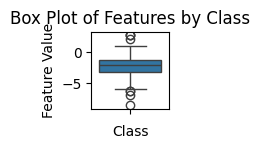

In [44]:
plt.figure(figsize=(1, 1))
sns.boxplot(y = new_df['PIC50'], data=new_df)
plt.title('Box Plot of Features by Class')
plt.xlabel('Class')
plt.ylabel('Feature Value')
plt.show()

Text(0, 0.5, 'Density')

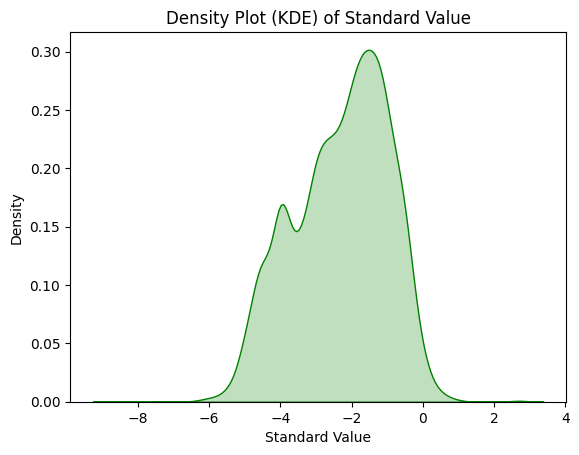

In [7]:
sns.kdeplot(new_df['PIC50'], fill=True, color='green')
plt.title('Density Plot (KDE) of Standard Value')
plt.xlabel('Standard Value')
plt.ylabel('Density')

In [8]:
new_df['PIC50'].max()

2.6989700043360187

In [9]:
new_df['PIC50'].min()

-8.579440597139797

In [10]:
pic50_threshold = []
for i in new_df.PIC50:
    if float(i)>=-1:
        pic50_threshold.append("Rank I")
    elif float(i)>=-8:
        pic50_threshold.append("Rank II")
    else:
        pic50_threshold.append("Rank III")
pic50_threshold

['Rank II',
 'Rank II',
 'Rank II',
 'Rank II',
 'Rank II',
 'Rank I',
 'Rank II',
 'Rank II',
 'Rank II',
 'Rank II',
 'Rank II',
 'Rank I',
 'Rank II',
 'Rank II',
 'Rank II',
 'Rank II',
 'Rank II',
 'Rank II',
 'Rank II',
 'Rank II',
 'Rank II',
 'Rank II',
 'Rank II',
 'Rank II',
 'Rank II',
 'Rank II',
 'Rank II',
 'Rank I',
 'Rank II',
 'Rank II',
 'Rank II',
 'Rank I',
 'Rank II',
 'Rank II',
 'Rank I',
 'Rank II',
 'Rank II',
 'Rank II',
 'Rank I',
 'Rank II',
 'Rank II',
 'Rank II',
 'Rank II',
 'Rank II',
 'Rank II',
 'Rank II',
 'Rank II',
 'Rank II',
 'Rank II',
 'Rank II',
 'Rank II',
 'Rank II',
 'Rank II',
 'Rank I',
 'Rank II',
 'Rank II',
 'Rank II',
 'Rank II',
 'Rank I',
 'Rank II',
 'Rank II',
 'Rank II',
 'Rank II',
 'Rank II',
 'Rank II',
 'Rank II',
 'Rank I',
 'Rank II',
 'Rank II',
 'Rank II',
 'Rank II',
 'Rank II',
 'Rank II',
 'Rank II',
 'Rank II',
 'Rank II',
 'Rank I',
 'Rank I',
 'Rank I',
 'Rank II',
 'Rank II',
 'Rank II',
 'Rank II',
 'Rank II',
 'Ra

In [11]:
pic50_threshold.count("Rank II")

5201

In [12]:
PIC_50_class = pd.Series(pic50_threshold,name = 'PIC50 Class')
final_df = pd.concat([new_df,PIC_50_class],axis=1)
final_df.head()

,Standard Type,Smiles,Standard Value,PIC50,PIC50 Class
0,IC50,CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...,230.0,-2.361728,Rank II
1,IC50,O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1,50000.0,-4.698970,Rank II
2,IC50,C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...,50000.0,-4.698970,Rank II
3,IC50,Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...,35.0,-1.544068,Rank II
4,IC50,COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...,13.0,-1.113943,Rank II


In [13]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem, PandasTools
from rdkit.ML.Descriptors import MoleculeDescriptors

In [14]:
#generating chemical descriptors of the compunds using rdkit library
#these descriptors are the features on which our ml model will be trained

descriptor_names = [desc_name[0] for desc_name in Descriptors._descList] #208, list exists in rdkit, wol wt

calculator = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)

def calculate_descriptors(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles) # converting smiles to "molecular object"
        if mol is not None:
            return calculator.CalcDescriptors(mol)
        else:
            return [None] * len(descriptor_names)
    except:
        return [None] * len(descriptor_names)

descriptors = df['Smiles'].apply(calculate_descriptors) # applying the function to generate descriptors on the SMILES column in our original dataframe
desc = pd.DataFrame(descriptors.tolist(), columns=descriptor_names) # Adding these descriptors to a new data frame, whose column heading is the descriptor name
results_df = pd.concat([final_df, desc], axis=1) # make a final data frame by joing original df and df of chemical desciptors


[10:10:47] DEPRECATION WARNING: please use MorganGenerator
[10:10:47] DEPRECATION WARNING: please use MorganGenerator
[10:10:47] DEPRECATION WARNING: please use MorganGenerator
[10:10:47] DEPRECATION WARNING: please use MorganGenerator
[10:10:47] DEPRECATION WARNING: please use MorganGenerator
[10:10:47] DEPRECATION WARNING: please use MorganGenerator
[10:10:47] DEPRECATION WARNING: please use MorganGenerator
[10:10:47] DEPRECATION WARNING: please use MorganGenerator
[10:10:47] DEPRECATION WARNING: please use MorganGenerator
[10:10:47] DEPRECATION WARNING: please use MorganGenerator
[10:10:47] DEPRECATION WARNING: please use MorganGenerator
[10:10:47] DEPRECATION WARNING: please use MorganGenerator
[10:10:47] DEPRECATION WARNING: please use MorganGenerator
[10:10:47] DEPRECATION WARNING: please use MorganGenerator
[10:10:47] DEPRECATION WARNING: please use MorganGenerator
[10:10:47] DEPRECATION WARNING: please use MorganGenerator
[10:10:47] DEPRECATION WARNING: please use MorganGenerat

In [15]:
clean = results_df.dropna()
clean.head()

,Standard Type,Smiles,Standard Value,PIC50,PIC50 Class,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,IC50,CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...,230.0,-2.361728,Rank II,13.450481,13.450481,0.167702,-1.237584,0.295108,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
1,IC50,O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1,50000.0,-4.698970,Rank II,12.191887,12.191887,0.045335,-0.248971,0.705740,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,IC50,C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...,50000.0,-4.698970,Rank II,12.957424,12.957424,0.049385,-0.317974,0.328284,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,IC50,Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...,35.0,-1.544068,Rank II,12.632866,12.632866,0.003616,-0.353767,0.295518,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
4,IC50,COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...,13.0,-1.113943,Rank II,13.653820,13.653820,0.215010,-1.135580,0.141117,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0


In [16]:
from sklearn.preprocessing import RobustScaler # robust to outliers
df_robust = clean.copy()

# numeric columns excluding 'solubility' which is our target column for prediction by model
numeric_columns = df_robust.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = [col for col in numeric_columns if col != 'PIC50'] # dont scale y!

scaler = RobustScaler()

# scale selected numeric columns
df_robust[numeric_columns] = scaler.fit_transform(df_robust[numeric_columns])

df_robust.head()

,Standard Type,Smiles,Standard Value,PIC50,PIC50 Class,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,IC50,CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...,0.053831,-2.361728,Rank II,0.658983,0.658983,0.286778,-1.694395,-0.239510,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,IC50,O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1,27.392475,-4.698970,Rank II,-0.154100,-0.154100,-0.417818,0.760323,1.139600,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,IC50,C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...,27.392475,-4.698970,Rank II,0.340456,0.340456,-0.394503,0.588988,-0.128086,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,IC50,Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...,-0.053282,-1.544068,Rank II,0.130783,0.130783,-0.658041,0.500115,-0.238131,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,0.0
4,IC50,COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...,-0.065367,-1.113943,Rank II,0.790345,0.790345,0.559180,-1.441121,-0.756688,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,0.0


In [ ]:
df_robust = df_robust.drop('Standard Type', axis=1)

In [28]:
y = df_robust['PIC50 Class']
X = df_robust.drop(columns=['Smiles', 'PIC50','PIC50 Class'])

In [29]:
print(y.head())
print(X.head())

0    Rank II
1    Rank II
2    Rank II
3    Rank II
4    Rank II
Name: PIC50 Class, dtype: object
   Standard Value  MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  \
0        0.053831           0.658983        0.658983           0.286778   
1       27.392475          -0.154100       -0.154100          -0.417818   
2       27.392475           0.340456        0.340456          -0.394503   
3       -0.053282           0.130783        0.130783          -0.658041   
4       -0.065367           0.790345        0.790345           0.559180   

   MinEStateIndex       qed       SPS     MolWt  HeavyAtomMolWt  ExactMolWt  \
0       -1.694395 -0.239510  2.925470  1.144994        1.113098    1.144077   
1        0.760323  1.139600 -0.321821 -0.732967       -0.738532   -0.733044   
2        0.588988 -0.128086  0.803226  0.856453        0.873753    0.856382   
3        0.500115 -0.238131 -0.232905  0.103267        0.037689    0.103270   
4       -1.441121 -0.756688 -0.081445  0.684933        0

In [30]:
from sklearn.ensemble import RandomForestClassifier
# Initialize RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the RandomForestClassifier on the entire dataset
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame to map features to their importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Extract the top 25 features
selected_features = importance_df.head(25)['Feature'].tolist()

print("Top n features:", selected_features)

Top n features: ['Standard Value', 'FpDensityMorgan3', 'BCUT2D_LOGPLOW', 'MinAbsEStateIndex', 'BCUT2D_MWLOW', 'BCUT2D_MRHI', 'BCUT2D_CHGHI', 'VSA_EState3', 'MaxAbsEStateIndex', 'VSA_EState5', 'BalabanJ', 'VSA_EState4', 'AvgIpc', 'VSA_EState6', 'BCUT2D_MRLOW', 'VSA_EState7', 'MaxEStateIndex', 'MinEStateIndex', 'BCUT2D_LOGPHI', 'BCUT2D_CHGLO', 'FpDensityMorgan2', 'VSA_EState2', 'FpDensityMorgan1', 'EState_VSA4', 'qed']


In [31]:
X_selected = pd.DataFrame(X, columns=selected_features)

X_selected.head()

,Standard Value,FpDensityMorgan3,BCUT2D_LOGPLOW,MinAbsEStateIndex,BCUT2D_MWLOW,BCUT2D_MRHI,BCUT2D_CHGHI,VSA_EState3,MaxAbsEStateIndex,VSA_EState5,...,VSA_EState7,MaxEStateIndex,MinEStateIndex,BCUT2D_LOGPHI,BCUT2D_CHGLO,FpDensityMorgan2,VSA_EState2,FpDensityMorgan1,EState_VSA4,qed
0,0.053831,0.280766,-1.919001,0.286778,-0.878181,2.311845,1.039947,-0.290731,0.658983,0.135711,...,0.810971,0.658983,-1.694395,0.152334,-0.875790,0.220992,2.133625,-0.005966,0.248546,-0.239510
1,27.392475,-0.917492,0.812553,-0.417818,-0.270615,0.064424,-0.500647,0.237509,-0.154100,0.131067,...,-0.742673,-0.154100,0.760323,0.149042,0.426888,-1.158301,-0.735818,-1.179918,-0.538619,1.139600
2,27.392475,-0.155268,-1.395640,-0.394503,-0.299835,0.071110,0.424569,-1.414911,0.340456,0.745340,...,-0.449381,0.340456,0.588988,0.002593,-1.114301,-0.256163,0.597644,-0.441792,-0.064960,-0.128086
3,-0.053282,-0.807393,-0.012732,-0.658041,-0.272653,-0.024695,-0.398680,0.103715,0.130783,-0.003648,...,0.148141,0.130783,0.500115,-0.126594,0.004839,-0.762548,0.067718,-0.506317,0.540565,-0.238131
4,-0.065367,-1.874304,-0.241066,0.559180,-2.337071,-0.027229,0.784529,0.009834,0.790345,-0.952801,...,0.055729,0.790345,-1.441121,0.892183,-0.851123,-1.665058,-0.038457,-1.158735,-0.200039,-0.756688


In [32]:
data=X_selected.copy()
data['bioactivity_class']=y

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
target = 'bioactivity_class'

In [53]:
#WITHOUT TAKING HYPERPARAMETER TUNING INTO CONSIDERATION
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
# Splitting the data into features (X) and target (y)
X_train = train_data.drop(columns=[target])
y_train = train_data[target]
X_test = test_data.drop(columns=[target])
y_test = test_data[target]

# Initializing the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=25, random_state=42)

# Fitting the model on the training data
rf_classifier.fit(X_train, y_train)

# Making predictions on the test data
y_pred = rf_classifier.predict(X_test)

y_train_pred=rf_classifier.predict(X_train)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
y_scores = rf_classifier.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_scores)
print(roc_auc)

Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

      Rank I       0.20      0.08      0.11       216
     Rank II       0.82      0.93      0.88      1000

    accuracy                           0.78      1216
   macro avg       0.51      0.51      0.49      1216
weighted avg       0.71      0.78      0.74      1216

Confusion Matrix:
[[ 17 199]
 [ 66 934]]
0.5025694444444444


In [34]:
print("Classification Report:")
print(classification_report(y_train, y_train_pred))

Classification Report:
              precision    recall  f1-score   support

      Rank I       0.98      0.91      0.94       843
     Rank II       0.98      1.00      0.99      4020
    Rank III       1.00      1.00      1.00         1

    accuracy                           0.98      4864
   macro avg       0.99      0.97      0.98      4864
weighted avg       0.98      0.98      0.98      4864



In [55]:
#WITH HYPERPARAMETER TUNING
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
# Splitting the data into features (X) and target (y)
X_train = train_data.drop(columns=[target])
y_train = train_data[target]
X_test = test_data.drop(columns=[target])
y_test = test_data[target]

# Initializing the Random Forest Classifier with adjustments
rf_classifier = RandomForestClassifier(
    n_estimators=150,          # Increase number of trees
    max_depth=8,              # Limit maximum depth of trees
    min_samples_split=5,       # Minimum samples to split a node
    min_samples_leaf=3,        # Minimum samples at a leaf node
    random_state=42,
    max_features='sqrt'
)

# Fitting the model on the training data
rf_classifier.fit(X_train, y_train)

# Making predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Optionally, you can also evaluate training predictions
y_train_pred = rf_classifier.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
y_scores = rf_classifier.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_scores)
print(f"ROC AUC = {roc_auc}")

Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

      Rank I       0.00      0.00      0.00       216
     Rank II       0.82      1.00      0.90      1000

    accuracy                           0.82      1216
   macro avg       0.41      0.50      0.45      1216
weighted avg       0.68      0.82      0.74      1216

Confusion Matrix:
[[   0  216]
 [   0 1000]]
Training Accuracy: 0.8279194078947368
ROC AUC = 0.5317407407407407


c:\Users\arush\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


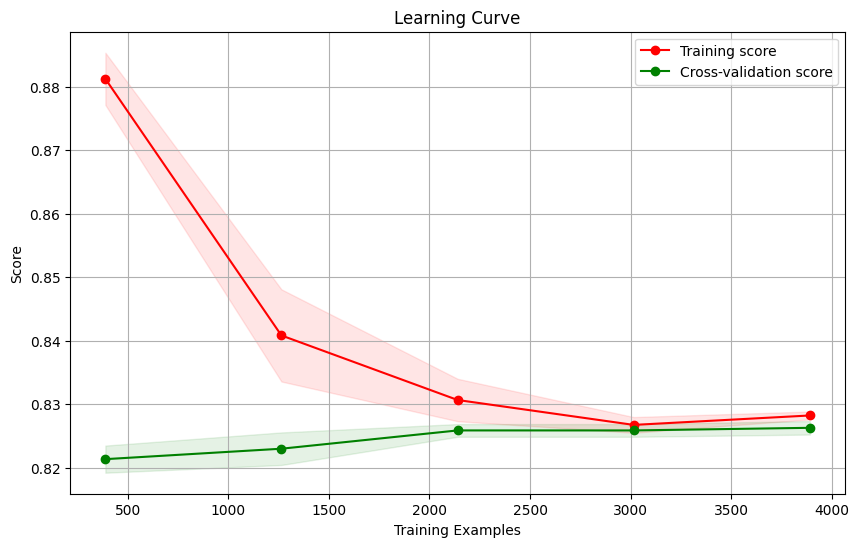

In [36]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, title="Learning Curve", cv=5, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training Examples")
    plt.ylabel("Score")

    # Calculate learning curve
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')

    # Mean and standard deviation for training and validation scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot the learning curve
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

# Plot learning curve for the RandomForestClassifier
plot_learning_curve(rf_classifier, X_train, y_train)

In [ ]:

roc_auc = roc_auc_score(y_test, y_scores)

In [52]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
lazy_class = LazyClassifier()
train,test = lazy_class.fit(X_train, X_test, y_train, y_test)

# Print the results
print(train)

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [43]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


def objective(trial):
    # Suggest hyperparameters
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 5, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
    max_features = trial.suggest_categorical('max_features', ['sqrt','log2',None])

    # Create and evaluate the model
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )

    score = cross_val_score(model, X_selected, y, n_jobs=-1, cv=3).mean()
    return score

# Create a study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Print the best hyperparameters
print("Best hyperparameters: ", study.best_params)


[I 2024-09-28 10:34:35,902] A new study created in memory with name: no-name-53ac857b-2342-46fb-b020-38322c904d86
[I 2024-09-28 10:34:47,857] Trial 0 finished with value: 0.8246709890320748 and parameters: {'n_estimators': 240, 'max_depth': 47, 'min_samples_split': 6, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.8246709890320748.
[I 2024-09-28 10:34:51,804] Trial 1 finished with value: 0.7967097848021761 and parameters: {'n_estimators': 60, 'max_depth': 35, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 0 with value: 0.8246709890320748.
[I 2024-09-28 10:34:58,741] Trial 2 finished with value: 0.8144731059943803 and parameters: {'n_estimators': 213, 'max_depth': 24, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 0 with value: 0.8246709890320748.
[I 2024-09-28 10:35:06,228] Trial 3 finished with value: 0.8223685737768816 and parameters: {'n_estimators': 221, 'max_depth': 44, 'mi

Best hyperparameters:  {'n_estimators': 56, 'max_depth': 6, 'min_samples_split': 9, 'min_samples_leaf': 4, 'max_features': None}


In [48]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_classification

In [49]:
rf = RandomForestClassifier(random_state=42)
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
}
randomized_search = RandomizedSearchCV(estimator=rf,
                                       param_distributions=param_dist,
                                       n_iter=50,  # Number of parameter settings to sample
                                       scoring='accuracy',
                                       cv=5,
                                       verbose=2,
                                       n_jobs=-1,
                                       random_state=42)  # For reproducibility
randomized_search.fit(X_train, y_train)
print("Best Parameters:", randomized_search.best_params_)
print("Best Cross-validation Score:", randomized_search.best_score_)
best_rf = randomized_search.best_estimator_
test_score = best_rf.score(X_test, y_test)
print("Test Score:", test_score)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10}
Best Cross-validation Score: 0.8262752760754359
Test Score: 0.821546052631579


In [ ]:
PI50 = pd.read_csv('main.csv', names=['name','Smiles'])

In [58]:
#Testing
test_df = pd.read_csv('test.csv')
test_df

,Smiles
0,CNC(=O)c1csc(CCCN2CCN(CNC3CC3c3ccccc3)CC2)c1
1,CNC(=O)c1csc(CCCN2CCC(CNC3CC3c3ccccc3)CC2)n1
2,CNC(=O)c1csc(CCCN2CCN(CNC3CC3c3ccccc3)CC2)n1
3,CNC(=O)c1csc(CCCN2CCC(CCC3CC3c3ccccc3)CC2)n1
4,COC(=O)c1csc(CCCN2CCC(CNC3CC3c3ccccc3)CC2)n1
5,C=C(CO)c1csc(CCCN2CCC(CNC3CC3c3ccccc3)CC2)n1
6,O=C(CO)c1csc(CCCN2CCC(CNC3CC3c3ccccc3)CC2)c1
7,O=C(CO)c1csc(CCCN2CCC(CNC3CC3c3ccccn3)CC2)n1
8,O=C(CO)c1csc(CCCN2CCN(CNC3CC3c3ccccc3)CC2)n1
9,C=CC(O)c1csc(CCCN2CCC(CNC3CC3c3ccccc3)CC2)n1


In [59]:
descriptor_names = [desc_name[0] for desc_name in Descriptors._descList] #208, list exists in rdkit, wol wt


calculator = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)


def calculate_descriptors(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles) # converting smiles to "molecular object"
        if mol is not None:
            return calculator.CalcDescriptors(mol)
        else:
            return [None] * len(descriptor_names)
    except:
        return [None] * len(descriptor_names)


descriptors = test_df['Smiles'].apply(calculate_descriptors) # calculating descriptors for all smiles in our original dataframe
desc = pd.DataFrame(descriptors.tolist(), columns=descriptor_names) # Adding these descriptors as lists to a new data frame, whose column heading is the descriptor name
results_dt = pd.concat([test_df, desc], axis=1) # make a final data frame


[11:10:01] DEPRECATION WARNING: please use MorganGenerator
[11:10:01] DEPRECATION WARNING: please use MorganGenerator
[11:10:01] DEPRECATION WARNING: please use MorganGenerator
[11:10:01] DEPRECATION WARNING: please use MorganGenerator
[11:10:01] DEPRECATION WARNING: please use MorganGenerator
[11:10:01] DEPRECATION WARNING: please use MorganGenerator
[11:10:01] DEPRECATION WARNING: please use MorganGenerator
[11:10:01] DEPRECATION WARNING: please use MorganGenerator
[11:10:01] DEPRECATION WARNING: please use MorganGenerator
[11:10:01] DEPRECATION WARNING: please use MorganGenerator
[11:10:01] DEPRECATION WARNING: please use MorganGenerator
[11:10:01] DEPRECATION WARNING: please use MorganGenerator
[11:10:01] DEPRECATION WARNING: please use MorganGenerator
[11:10:01] DEPRECATION WARNING: please use MorganGenerator
[11:10:01] DEPRECATION WARNING: please use MorganGenerator
[11:10:01] DEPRECATION WARNING: please use MorganGenerator
[11:10:01] DEPRECATION WARNING: please use MorganGenerat

In [60]:
cleaned_dt= results_dt.dropna()
print(f"Original DataFrame shape: {results_dt.shape}")
print(f"Cleaned DataFrame shape: {cleaned_dt.shape}")

Original DataFrame shape: (50, 211)
Cleaned DataFrame shape: (50, 211)


In [65]:
from sklearn.preprocessing import RobustScaler # robust to outliers
robust_dt = cleaned_dt.copy()

# numeric columns excluding 'FDA_APPROVED'
numeric_columns1 = robust_dt.select_dtypes(include=['float64', 'int64']).columns
numeric_columns1 = [col for col in numeric_columns1]

scaler = RobustScaler()

# scale selected numeric columns
robust_dt[numeric_columns1] = scaler.fit_transform(robust_dt[numeric_columns1])

robust_dt

,Smiles,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CNC(=O)c1csc(CCCN2CCN(CNC3CC3c3ccccc3)CC2)c1,0.15,0.15,-1.37,1.32,1.64,0.00,-0.27,-0.36,-0.26,...,0.00,0.00,0.00,0.00,0.00,-1.00,0.00,1.00,0.00,0.00
1,CNC(=O)c1csc(CCCN2CCC(CNC3CC3c3ccccc3)CC2)n1,0.12,0.12,-0.97,1.03,1.63,0.00,-0.27,-0.36,-0.26,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,CNC(=O)c1csc(CCCN2CCN(CNC3CC3c3ccccc3)CC2)n1,0.12,0.12,-0.95,1.01,1.61,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,CNC(=O)c1csc(CCCN2CCC(CCC3CC3c3ccccc3)CC2)n1,0.12,0.12,-1.00,1.04,1.52,0.00,-0.53,-0.72,-0.53,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,COC(=O)c1csc(CCCN2CCC(CNC3CC3c3ccccc3)CC2)n1,0.07,0.07,0.25,0.33,1.42,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,C=C(CO)c1csc(CCCN2CCC(CNC3CC3c3ccccc3)CC2)n1,-1.06,-1.06,-1.36,1.25,1.32,0.10,-0.53,-0.72,-0.53,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,O=C(CO)c1csc(CCCN2CCC(CNC3CC3c3ccccc3)CC2)c1,0.08,0.08,-0.57,0.19,1.04,0.10,-0.27,-0.36,-0.27,...,0.00,0.00,0.00,0.00,0.00,-1.00,0.00,1.00,0.00,0.00
7,O=C(CO)c1csc(CCCN2CCC(CNC3CC3c3ccccn3)CC2)n1,0.05,0.05,-0.01,0.00,1.02,0.10,0.27,0.36,0.27,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,O=C(CO)c1csc(CCCN2CCN(CNC3CC3c3ccccc3)CC2)n1,0.05,0.05,0.00,-0.00,1.00,0.10,0.27,0.36,0.27,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,C=CC(O)c1csc(CCCN2CCC(CNC3CC3c3ccccc3)CC2)n1,-0.77,-0.77,1.66,-0.48,0.98,0.92,-0.53,-0.72,-0.53,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [67]:
filter_dt=pd.DataFrame(robust_dt,columns=selected_features)
filter_dt.drop(['Standard Value'],axis=1)

,FpDensityMorgan3,BCUT2D_LOGPLOW,MinAbsEStateIndex,BCUT2D_MWLOW,BCUT2D_MRHI,BCUT2D_CHGHI,VSA_EState3,MaxAbsEStateIndex,VSA_EState5,BalabanJ,...,VSA_EState7,MaxEStateIndex,MinEStateIndex,BCUT2D_LOGPHI,BCUT2D_CHGLO,FpDensityMorgan2,VSA_EState2,FpDensityMorgan1,EState_VSA4,qed
0,-0.79,-2.95,-1.37,2.54,1.61,-0.26,-0.73,0.15,-0.56,0.00,...,-0.87,0.15,1.32,-0.03,-1.06,-0.75,0.22,-0.71,2.61,1.64
1,0.26,-0.01,-0.97,0.00,0.00,0.57,-0.53,0.12,-0.04,0.00,...,-0.24,0.12,1.03,-0.00,-0.00,0.25,0.27,0.36,-0.50,1.63
2,-0.52,-2.95,-0.95,2.54,0.00,-0.24,-0.55,0.12,-0.65,0.00,...,-0.92,0.12,1.01,-0.04,-1.05,-0.50,0.50,-0.36,2.53,1.61
3,0.00,0.99,-1.00,-0.91,0.00,-0.39,-1.32,0.12,0.80,0.00,...,0.55,0.12,1.04,1.00,0.04,0.00,0.27,0.00,0.35,1.52
4,0.52,-0.00,0.25,0.00,-0.03,0.59,-1.10,0.07,-0.22,0.00,...,-0.26,0.07,0.33,-0.00,-0.00,0.50,0.25,0.71,0.44,1.42
5,0.26,-0.00,-1.36,0.00,-0.29,0.55,0.88,-1.06,0.04,0.00,...,-0.20,-1.06,1.25,-0.00,-0.00,0.25,-0.77,0.36,0.32,1.32
6,0.00,-0.00,-0.57,-0.00,1.63,0.55,0.57,0.08,-0.10,0.00,...,-0.22,0.08,0.19,-0.00,-0.02,0.00,-0.03,0.00,-1.23,1.04
7,1.31,-0.01,-0.01,0.01,0.02,7.81,0.73,0.05,-0.29,0.00,...,0.18,0.05,0.00,-0.10,0.00,1.25,0.65,1.07,-0.41,1.02
8,-0.52,-2.95,0.00,2.54,0.02,-0.23,0.72,0.05,-0.79,0.00,...,-0.94,0.05,-0.00,-0.04,-1.05,-0.50,0.47,-0.36,2.53,1.00
9,0.52,-0.00,1.66,0.00,-0.61,0.57,0.99,-0.77,0.04,-0.00,...,0.01,-0.77,-0.48,-0.00,-0.00,0.50,-0.77,0.71,0.32,0.98


In [63]:
dt_pred = rf_classifier.predict(filter_dt)
dt_pred

array(['Rank II', 'Rank II', 'Rank II', 'Rank II', 'Rank II', 'Rank II',
       'Rank II', 'Rank II', 'Rank II', 'Rank II', 'Rank II', 'Rank II',
       'Rank II', 'Rank II', 'Rank II', 'Rank II', 'Rank II', 'Rank II',
       'Rank II', 'Rank II', 'Rank II', 'Rank II', 'Rank II', 'Rank II',
       'Rank II', 'Rank II', 'Rank II', 'Rank II', 'Rank II', 'Rank II',
       'Rank II', 'Rank II', 'Rank II', 'Rank II', 'Rank II', 'Rank II',
       'Rank II', 'Rank II', 'Rank II', 'Rank II', 'Rank II', 'Rank II',
       'Rank II', 'Rank II', 'Rank II', 'Rank II', 'Rank II', 'Rank II',
       'Rank II', 'Rank II'], dtype=object)

In [64]:
name_dt=pd.DataFrame(cleaned_dt,columns=['name','smiles'])
final_dt=name_dt.copy()
final_dt['bioactivity_class']=dt_pred
final_dt

,name,smiles,bioactivity_class
0,NaN,NaN,Rank II
1,NaN,NaN,Rank II
2,NaN,NaN,Rank II
3,NaN,NaN,Rank II
4,NaN,NaN,Rank II
5,NaN,NaN,Rank II
6,NaN,NaN,Rank II
7,NaN,NaN,Rank II
8,NaN,NaN,Rank II
9,NaN,NaN,Rank II


In [ ]:
COC(=O)c1csc(CCCN2CCC(CNC3CC3c3ccccc3)CC2)n1